In [169]:
#load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [170]:
# read the data

df = pd.read_csv('../../Mall Customer Segmentation.csv')

In [171]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We can see our data set consists of only a few columns where all variables could impact the mall's potential sales. Let's see if we can break out key groups to find target marketing clusters.

# Univariate Analysis

In [172]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The  average age in our data set is 38 with a  60k salary.

Let's create a histogram of one of our variables to see how its distributed

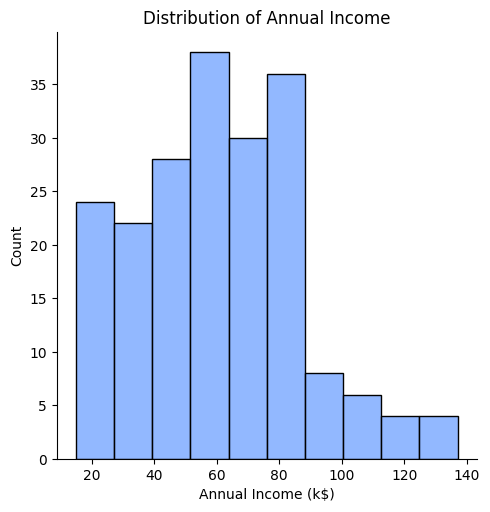

In [173]:
annual_income_chart = sns.displot(data=df['Annual Income (k$)'], 
                                  color='#6ea0ff').set(title='Distribution of Annual Income')

In [174]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [175]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Let's create some histograms of the numerical varibales and have a KDE line over each hitogram.

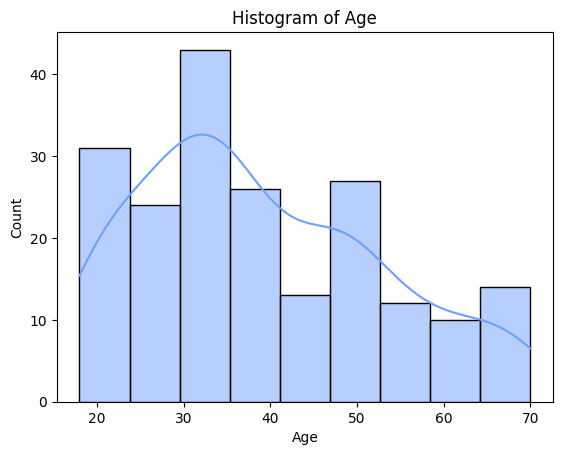

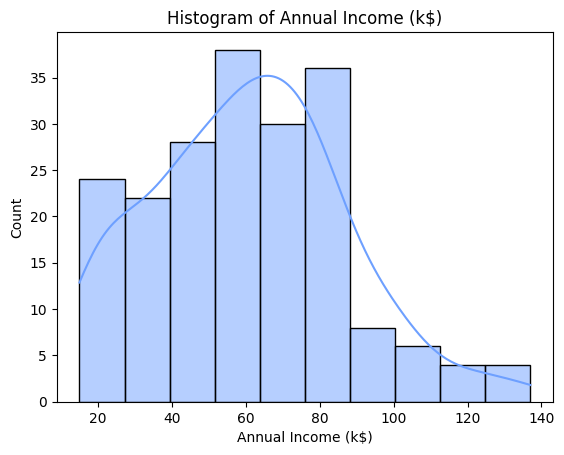

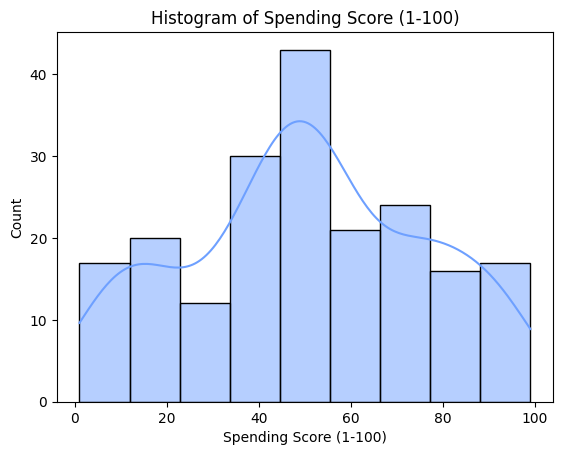

In [176]:
#we must exclude gender when creating these plots since gender is a object data type

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]
for col in columns: 
    plt.figure()
    sns.histplot(df[col], kde=True, color='#6ea0ff').set(title=(f"Histogram of {col}"))

### Now let's create some KDE plots to compare the values by gender

First, let's dig a little deeper into our male and female customers.

In [177]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

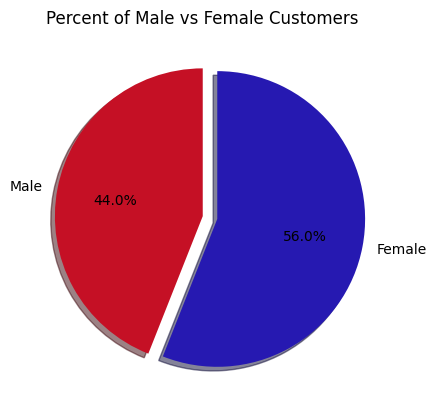

In [178]:
explode = (0, 0.1)
labels = ['Male', 'Female']
colors = ['#C51025', '#2619B1']
x = [88, 112]

plt.title("Percent of Male vs Female Customers")
plt.pie(x=x, explode = explode, shadow=True, startangle=90, labels=labels, colors = colors, autopct='%1.1f%%');

We can see we have more female than male customers at the mall.

Now, let's make our KDE plots.

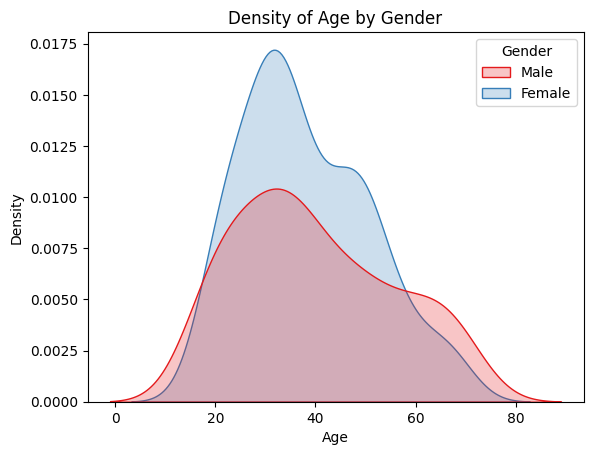

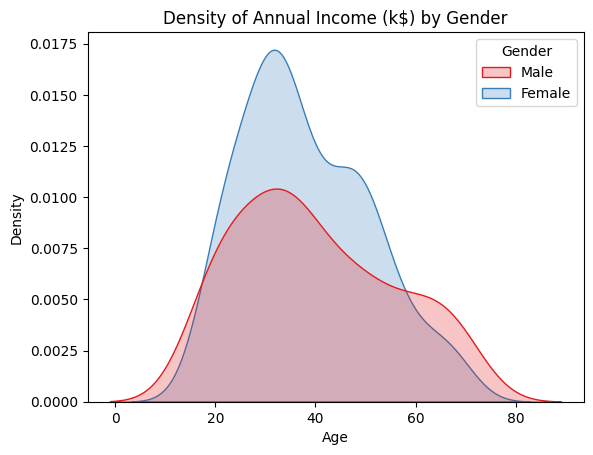

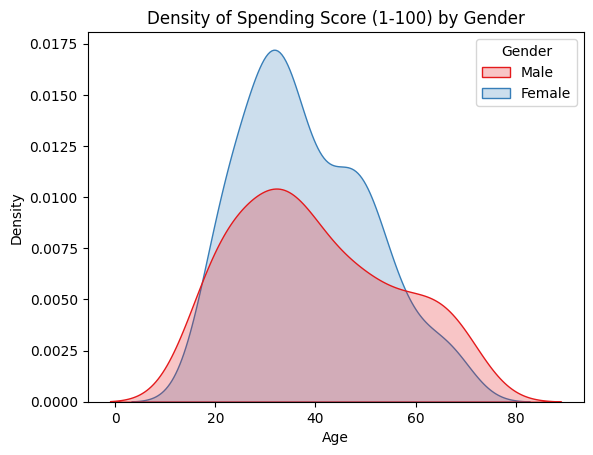

In [179]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]
for col in columns: 
    plt.figure()
    sns.kdeplot(df.reset_index(drop=True), 
                x=df['Age'], 
                hue='Gender', 
                fill=True, 
                palette="Set1").set(title=f'Density of {col} by Gender')


Let's create some box plots to look at the differences between male vs female customers

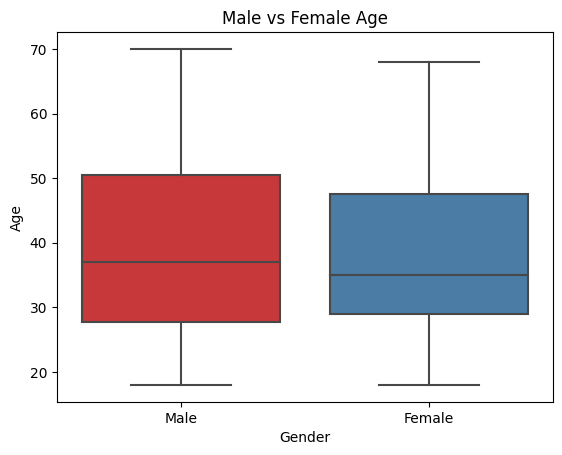

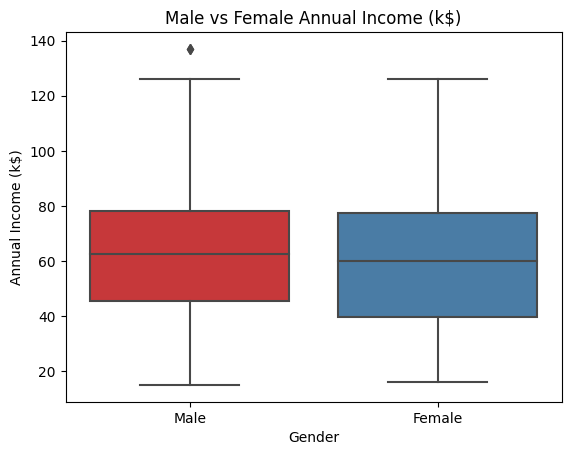

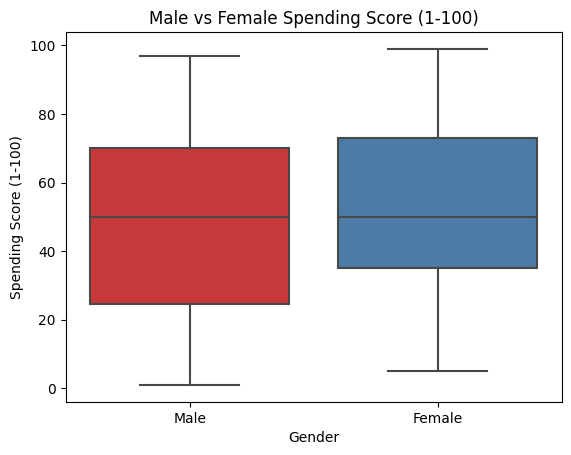

In [180]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]
for col in columns: 
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[col], palette="Set1", saturation=.7).set(title=f'Male vs Female {col}')

# Bivariate Analysis

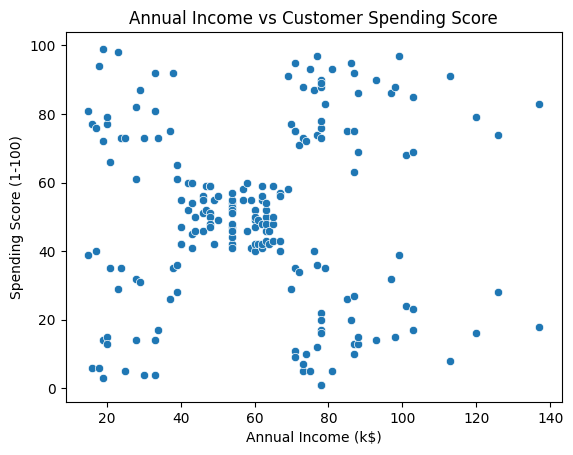

In [181]:
sns.scatterplot(data=df, x= 'Annual Income (k$)', 
                y='Spending Score (1-100)'
                ).set(title='Annual Income vs Customer Spending Score');

Just looking at the scatterplot above, we can see what looks like 5 or so clusters with these two variables.

In [182]:
#drop customer Id column 
df_wo_customer_id=df.drop('CustomerID', axis=1)

#### Mean by Gender

In [183]:
df_wo_customer_id.groupby(['Gender']).mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


#### Correlation

In [184]:
df_wo_customer_id.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


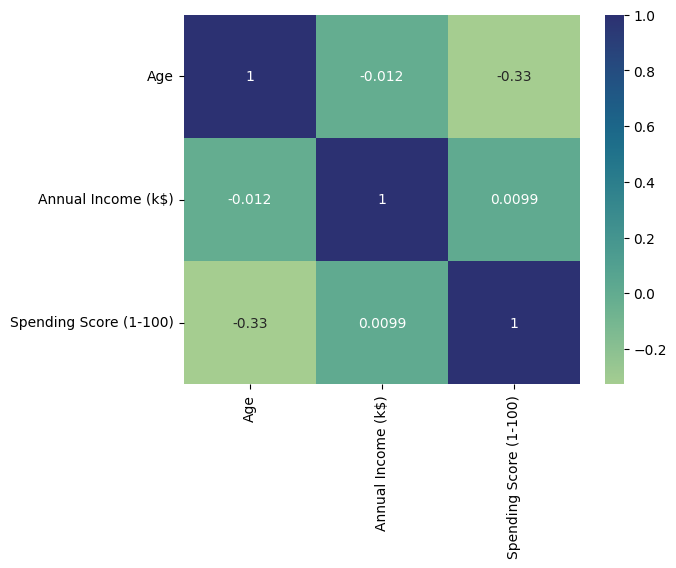

In [185]:
sns.heatmap(df_wo_customer_id.corr(), annot=True, cmap='crest');

We can see there a low negative correlation between spending score and age.

# Clustering - Univariate, Bivariate, and Multivariate

In [186]:
# we choose our number of clusters based on the elbow method and inertia scores computed below
cluster_uni = KMeans(n_clusters=3)

In [187]:
cluster_uni.fit(df_wo_customer_id[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [188]:
cluster_uni.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [189]:
#create income cluster column
df_wo_customer_id['Income Cluster'] = cluster_uni.labels_
df_wo_customer_id.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


We can get the total numbert of customers in each income cluster

In [190]:
df_wo_customer_id['Income Cluster'].value_counts()

2    92
0    72
1    36
Name: Income Cluster, dtype: int64

We can check the inertia of the clusters and  should aim for it to be a relatively low number.

In [191]:
cluster_uni.inertia_

23528.152173913055

We need to determine the best number of clusters and use the interia score and the elbow method to determine this.

In [192]:
inertia_scores = []
for num_of_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_of_clusters)
    kmeans.fit(df_wo_customer_id[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [193]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13278.112713472488,
 8481.49619047619,
 5081.484660267269,
 3931.988095238096,
 2827.308424908425,
 2352.3297555385793,
 1865.8049422799427]

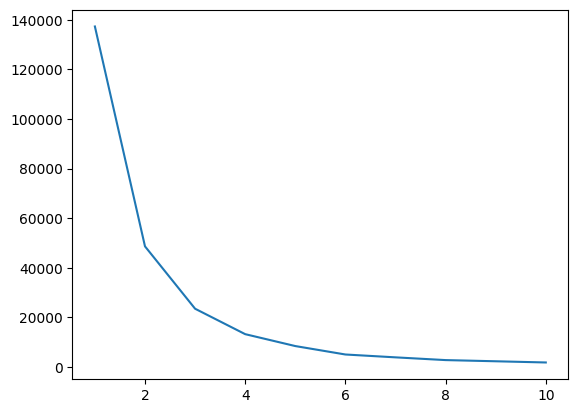

In [194]:
plt.plot(range(1,11), inertia_scores);

In [195]:
df_wo_customer_id[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster']].groupby(by='Income Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


We can see the mean values of Age, Annual Income, and Spending score for each of the three income clusters.

# Bivariate Clustering

Let's create our clusters.

In [196]:
cluster_bi = KMeans(n_clusters=5)
cluster_bi.fit(df_wo_customer_id[['Annual Income (k$)', 'Spending Score (1-100)']])
df_wo_customer_id['Spending and Income Cluster'] = cluster_bi.labels_
df_wo_customer_id.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


We will again use initeria scores and the elbow method to determine the best number of clusters.

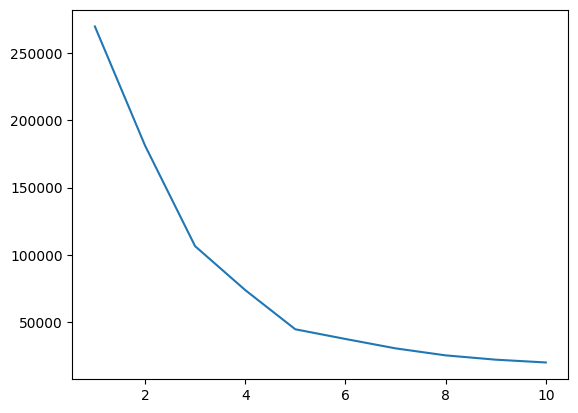

In [197]:
inertia_scores_bi = []
for i in range(1,11):
    kmeans_bi = KMeans(n_clusters=i)
    kmeans_bi.fit(df_wo_customer_id[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores_bi.append(kmeans_bi.inertia_)
plt.plot(range(1,11), inertia_scores_bi);

We can see 5 clusters looks like the ideal number of clusters.

In [198]:
inertia_scores_bi

[269981.2800000001,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30241.343617936585,
 25018.576334776335,
 21818.11458845218,
 19724.413115962052]

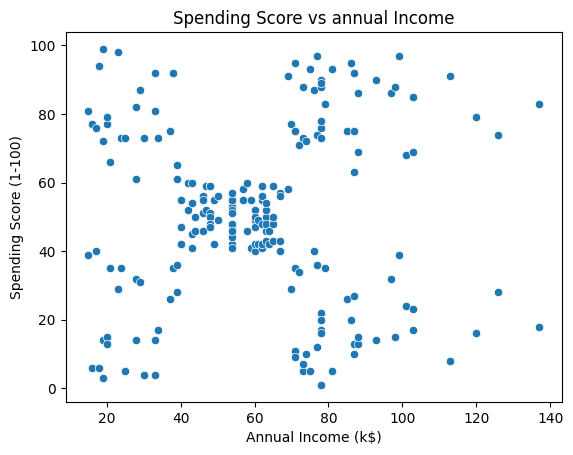

In [199]:
sns.scatterplot(data=df_wo_customer_id, x='Annual Income (k$)', 
                y='Spending Score (1-100)').set(title='Spending Score vs annual Income');

In [200]:
#find the centers of 5 clusters
centers = pd.DataFrame(cluster_bi.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


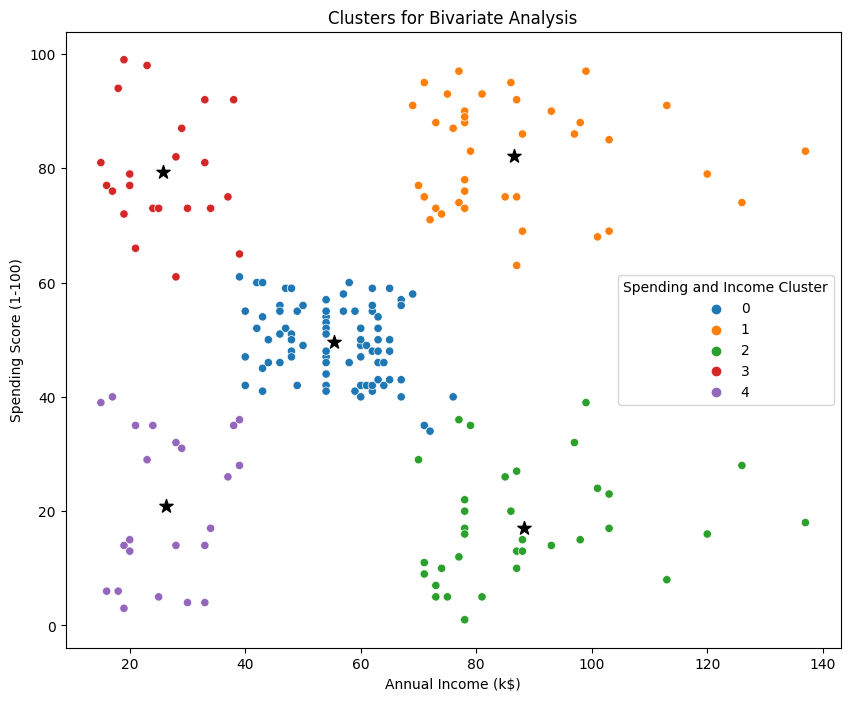

In [201]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df_wo_customer_id, x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                hue='Spending and Income Cluster', 
                palette='tab10').set(title='Clusters for Bivariate Analysis');

A target group would be cluster 1 since they have a high annual income and high spending score.
Since 54% of cluster 1 is women we should try a marketing campaign to target popular items in this cluster.
Cluster 2 has a high spending score but low annual income. A lot of poeple in cluster 2 could be spending their money on big ticket items like a new Xbox or something similar. We could target cluster 2 by marketing sales events on popular items.

We can further breakdown each cluster by gender to see how many males and females are in each cluster.

In [202]:
pd.crosstab(df_wo_customer_id['Spending and Income Cluster'], df_wo_customer_id['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


We can find the  mean of each column within each income cluster.

In [203]:
df_wo_customer_id[['Age', 
                   'Annual Income (k$)', 
                   'Spending Score (1-100)', 
                   'Spending and Income Cluster']].groupby(by='Spending and Income Cluster').mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


# Multivariate Clustering

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scale = StandardScaler()

In [206]:
df_wo_customer_id.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


In [207]:
#create one-hot-encoded variable for gender
dff = pd.get_dummies(df_wo_customer_id, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,4,1
1,21,15,81,0,3,1
2,20,16,6,0,4,0
3,23,16,77,0,3,0
4,31,17,40,0,4,0


In [208]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [209]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [210]:
dff=pd.DataFrame(scale.fit_transform(dff))

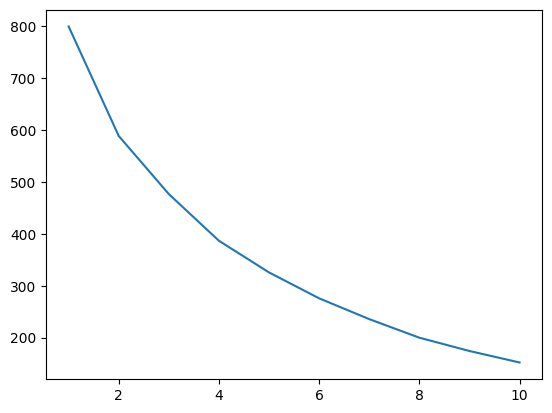

In [211]:
inertia_scores_multi = []
for i in range(1,11):
    kmeans_multi = KMeans(n_clusters=i)
    kmeans_multi.fit(dff)
    inertia_scores_multi.append(kmeans_multi.inertia_)
plt.plot(range(1,11), inertia_scores_multi);

In [212]:
inertia_scores_multi

[800.0,
 588.8026767824936,
 476.7732065607644,
 386.71478577406873,
 325.6827904073892,
 275.7520901215032,
 235.6297990682206,
 199.81861761323987,
 174.18800022186804,
 152.02983429775688]

In [213]:
cluster_multi = KMeans(n_clusters=4)
cluster_multi.fit(dff)
dff['Multivariate Cluster'] = cluster_multi.labels_
dff.head()

,0,1,2,3,Multivariate Cluster
0,-1.424569,-1.738999,-0.434801,1.128152,1
1,-1.281035,-1.738999,1.195704,1.128152,1
2,-1.352802,-1.700830,-1.715913,-0.886405,3
3,-1.137502,-1.700830,1.040418,-0.886405,0
4,-0.563369,-1.662660,-0.395980,-0.886405,0


From the elbow method and checking inertia scores we can see four clusters is best for our miultivariate clustering.